In [1]:
import numpy as np
import pandas as pd
from PyCMLutil.plots.multi_panel import multi_panel_from_flat_data as mpl

In [3]:
data_str = 'data_baro_paper.csv'
spatial_data_str = 'spatial_data_baro_paper.csv'

df = pd.read_csv(data_str)
sp_df = pd.read_csv(spatial_data_str)

data_str = 'data.csv'
spatial_data_str = 'spatial_data.csv'

df_new_master = pd.read_csv(data_str)
sp_d_new_master = pd.read_csv(spatial_data_str)

print(df.head())

   Unnamed: 0  activation  aorta_compliance  aorta_resistance  \
0           0         0.0            0.0004              20.0   
1           1         0.0            0.0004              20.0   
2           2         0.0            0.0004              20.0   
3           3         0.0            0.0004              20.0   
4           4         0.0            0.0004              20.0   

   aorta_slack_volume  aortic_insufficiency_conductance  aortic_reg_volume  \
0                 0.3                               0.0                0.0   
1                 0.3                               0.0                0.0   
2                 0.3                               0.0                0.0   
3                 0.3                               0.0                0.0   
4                 0.3                               0.0                0.0   

   arteries_compliance  arteries_resistance  arteries_slack_volume  ...  \
0               0.0008                 20.0                    0.

In [5]:
for v in ['k_1','k_3','k_on','k_act','k_serca','n_on','n_off',
                            'M_SRX','M_DRX','M_FG','hs_length','Ca_cytosol',
                            'total_stress','cb_stress','pas_stress']:
    df[v] = sp_df[v]
    df_new_master[v] = sp_d_new_master[v]
    

window = 400
df['ED_volume_ventricle'] = \
    df['volume_ventricle'].rolling(window = window).max()
df['ES_volume_ventricle'] = \
                        df['volume_ventricle'].rolling(window = window).min()
df['stroke_volume'] = \
                        df['ED_volume_ventricle'] - df['ES_volume_ventricle']
df['ejection_fraction'] = \
                        df['stroke_volume'] / df['ED_volume_ventricle']
df['ejection_fraction'].loc[:window+1] = df['ejection_fraction'].iloc[window+1]
df['cardiac_output'] = \
                        df['heart_rate'] * df['stroke_volume']

consolidated_df = pd.DataFrame()
consolidated_df['time'] = df['time']
for v in ['baroreflex_active','pressure_arteries','baro_b_setpoint',
            'baro_b','baro_c','heart_rate_t_quiescent_period_rc',
            'pressure_ventricle','volume_ventricle','heart_rate','arterioles_resistance',
            'veins_compliance','k_1','k_on','k_act','k_serca']:
    for p in ['old_master','new_master']:
        new_param_name = v + '_' + p
        if p == 'old_master':
         
            consolidated_df[new_param_name] = df[v]
        else:
            consolidated_df[new_param_name] = df_new_master[v]


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


KeyError: 'baroreflex_active_old_master'

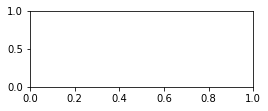

In [6]:
output_str = 'figures/multipanel_figure_compare.jpeg'
template_file_string = 'template_baro_MI_compare.json'

mpl(pandas_data = consolidated_df,
                    template_file_string = template_file_string,
                    output_image_file_string = output_str,
                    dpi = 300)

Saving figure to figures/PV_loop_figure.jpeg


(<Figure size 432x295.2 with 1 Axes>,
 [<AxesSubplot:xlabel='Time (s)', ylabel='Pressure\nmmHg'>])

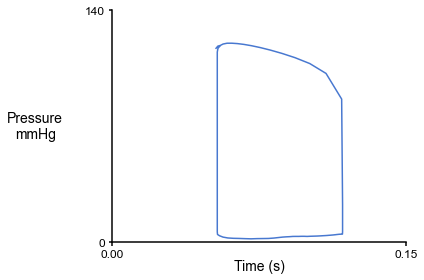

In [5]:
output_str = 'figures/PV_loop_figure.jpeg'
template_file_string = 'template_pv_loop.json'

time_frames = [(4.05,5)]
pv_loop_data = df[df['time'].between(time_frames[0][0],time_frames[0][-1])].reset_index()


mpl(pandas_data = pv_loop_data,
                template_file_string= template_file_string,
                output_image_file_string = output_str)
